In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_excel('excel.xlsx')

In [181]:
X = data[[ 'Expected Points','Wins','scored']]
y = data['xG']
data.head(10)


,Unnamed: 0,Home/Away,xG,xGA,scored,conceded,Expected Points,Wins,Draws,Loses,...,ppda defence,ppda allowed att,ppda allowed def,Points cum,npxG difference cum,xG cum,xGA cum,npxG cum,npxGA cum,Year
0,NaN,1,2.011290,2.038150,3,1,1.3373,1,0,0,...,23,240,35,3,-0.026860,2.011290,2.038150,1.249990,1.276850,2015
1,NaN,0,3.777940,1.430190,5,4,2.7525,1,0,0,...,17,300,26,6,1.559590,5.789230,3.468340,4.266630,2.707040,2015
2,NaN,1,0.281427,1.441090,0,1,0.3653,0,0,1,...,29,214,30,6,0.399927,6.070657,4.909430,4.548057,4.148130,2015
3,NaN,0,0.582640,2.034060,2,2,0.3677,0,1,0,...,41,271,28,7,-1.051493,6.653297,6.943490,5.130697,6.182190,2015
4,NaN,0,0.876708,1.130490,1,1,1.0364,0,1,0,...,23,252,22,8,-1.305275,7.530005,8.073980,6.007405,7.312680,2015
5,NaN,1,1.600950,0.552252,2,0,2.1869,1,0,0,...,24,291,42,11,-0.256577,9.130955,8.626232,7.608355,7.864932,2015
6,NaN,0,2.178990,1.527450,3,1,1.9176,1,0,0,...,26,246,23,14,0.394963,11.309945,10.153682,9.787345,9.392382,2015
7,NaN,1,0.857287,0.359683,1,1,1.8144,0,1,0,...,24,261,32,15,0.892567,12.167232,10.513365,10.644632,9.752065,2015
8,NaN,0,0.499723,1.928520,1,1,0.3755,0,1,0,...,25,298,25,16,-0.536230,12.666955,12.441885,11.144355,11.680585,2015
9,NaN,1,1.121590,1.650670,0,2,0.9358,0,0,1,...,27,351,25,16,-1.065310,13.788545,14.092555,12.265945,13.331255,2015


In [205]:
from sklearn.preprocessing import MinMaxScaler, normalize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# Нормалізація даних за допомогою L2-норми
X_train_scaled = normalize(X_train, norm='l2')
X_test_scaled = normalize(X_test, norm='l2')
print(data.fillna(0).describe())


       Unnamed: 0   Home/Away          xG         xGA      scored    conceded  \
count       266.0  266.000000  266.000000  266.000000  266.000000  266.000000   
mean          0.0    0.500000    1.518820    1.198651    1.541353    1.139098   
std           0.0    0.500943    0.846896    0.709079    1.216312    1.031309   
min           0.0    0.000000    0.104831    0.104562    0.000000    0.000000   
25%           0.0    0.000000    0.857783    0.614112    1.000000    0.000000   
50%           0.0    0.500000    1.395575    1.105480    1.000000    1.000000   
75%           0.0    1.000000    2.006500    1.637783    2.000000    2.000000   
max           0.0    1.000000    4.568090    3.447560    7.000000    5.000000   

       Expected Points        Wins       Draws       Loses  ...  ppda defence  \
count       266.000000  266.000000  266.000000  266.000000  ...    266.000000   
mean          1.594612    0.473684    0.266917    0.259398  ...     24.601504   
std           0.813726    0

In [206]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<Axes: >

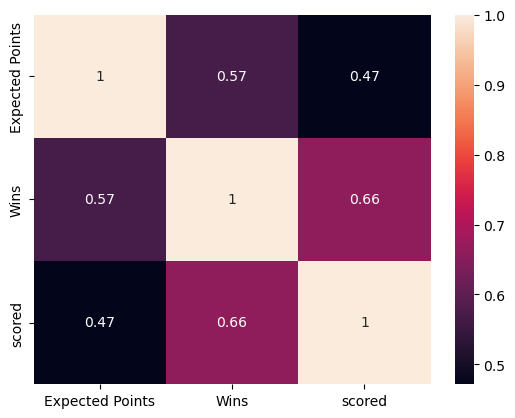

In [207]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, annot=True)

In [208]:
r2 = regressor.score(X, y)
r2

0.7080387452707866

In [212]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

# Створення моделі 2
# Передбачені значення моделі 1
y_pred_model1 = model1.predict(X_test)


# Обчислення середньоквадратичної помилки (MSE)
mse_model1 = mean_squared_error(y_test, y_pred_model1)

# Обчислення середньої абсолютної помилки (MAE)
mae_model1 = mean_absolute_error(y_test, y_pred_model1)

# Обчислення коефіцієнта детермінації (R^2)
r2_model1 = r2_score(y_test, y_pred_model1)

# Виведення результатів
print("Model 1:")
print("MSE:", mse_model1)
print("MAE:", mae_model1)
print("R^2:", r2_model1)


Model 1:
MSE: 0.4433166123874427
MAE: 0.5450185555163904
R^2: 0.29095092328271965


In [188]:
from sklearn.preprocessing import StandardScaler

# Створюємо об'єкт класу StandardScaler
scaler = StandardScaler()

# Проводимо стандартизацію даних
X_scaled = scaler.fit_transform(X)

In [202]:
model = LinearRegression()
model.fit(X_scaled, y)

#y_pred = model.predict(X_scaled_new)
r2 = model.score(X_scaled, y)
r2


0.7096030063572307

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Створюємо об'єкт класу Ridge
model = Ridge()

# Задаємо гіперпараметри, які потрібно перевірити
param_grid = {'alpha': [0.1, 1.0,5,8,12.0]}

# Використовуємо Grid Search для знаходження найкращих значень гіперпараметрів
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_scaled, y)

# Виводимо найкращі значення гіперпараметрів та оцінку точності моделі
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'alpha': 1.0}
Best Score:  0.6506318281013181


In [218]:
from sklearn.linear_model import Ridge

# Створення об'єкта моделі Ridge з найкращим параметром alpha
model = Ridge(alpha=1.0)

# Після цього ви можете навчати модель зі зміненими параметрами на своїх даних:
model.fit(X_scaled, y)

# І використовувати навчену модель для передбачення:
y_pred = model.predict(X_scaled)
r2 = model.score(X_scaled, y)
print("R2 Score:", r2)
print("model coeficients",model.coef_)
print("model intercept",model.intercept_)

R2 Score: 0.709583597550628
model coeficients [ 0.60782543 -0.17124821  0.32966676]
model intercept 1.5188201954887217


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Створюємо об'єкт класу GradientBoostingRegressor
model = GradientBoostingRegressor()

# Навчаємо модель на нормалізованих даних
model.fit(X_scaled, y)

# Оцінюємо точність моделі
r2 = model.score(X_scaled, y)
r2

0.8483526419730878

In [192]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
r2 = model.score(X_poly, y)
r2

0.7350814478802385

Нормалізація даних

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
model = LinearRegression()
model.fit(X_poly_scaled, y)

r2 = model.score(X_poly_scaled, y)
r2

0.7350814478802385

In [196]:
print("model intercept",model.intercept_)


model intercept 0.44392017942691164


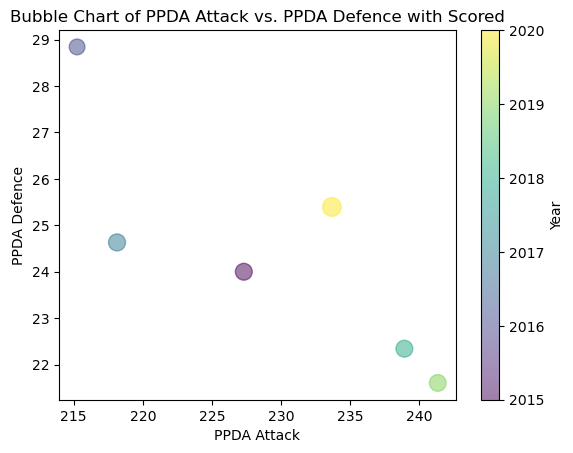

In [145]:
import matplotlib.pyplot as plt

# Групування даних за роком
data_by_year = data.groupby('Year')[['ppda attack', 'ppda defence', 'scored']].mean()

# Роки
years = data_by_year.index

# Значення ppda attack та ppda defence
ppda_attack = data_by_year['ppda attack'].values
ppda_defence = data_by_year['ppda defence'].values

# Розмір кіл відповідатиме середньому значенню scored
scored = data_by_year['scored'].values

# Візуалізація bubble chart
plt.scatter(ppda_attack, ppda_defence, s=scored*100, c=years, cmap='viridis', alpha=0.5)
plt.colorbar(label='Year')
plt.xlabel('PPDA Attack')
plt.ylabel('PPDA Defence')
plt.title('Bubble Chart of PPDA Attack vs. PPDA Defence with Scored')
plt.show()

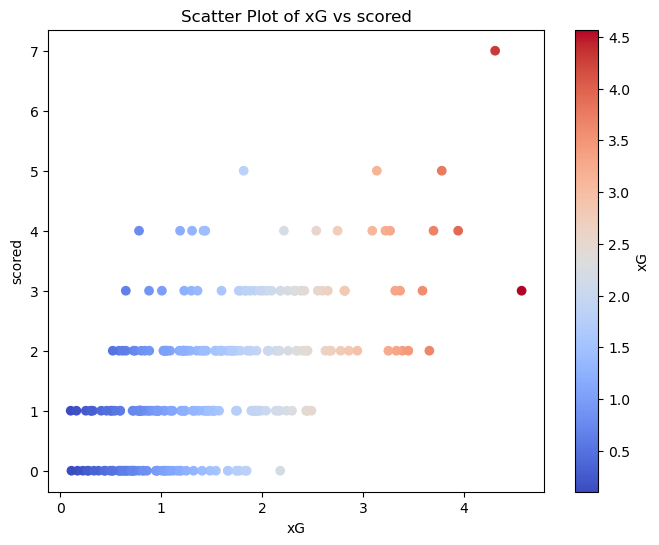

In [141]:
import matplotlib.pyplot as plt

# Значення змінних 'xG' і 'scored'
xG = data['xG']
scored = data['scored']

# Візуалізація
plt.figure(figsize=(8, 6))
plt.scatter(xG, scored, c=xG, cmap='coolwarm')  # Використовуйте 'xG' як колір точок
plt.xlabel('xG')
plt.ylabel('scored')
plt.title('Scatter Plot of xG vs scored')
plt.colorbar(label='xG')  # Додаткова колірна шкала для 'xG'
plt.show()

In [172]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm.keras import TqdmCallback
from keras import regularizers

# Перетворення даних до numpy масиву
X = np.array(data[['Expected Points', 'Wins']])
y = np.array(data['xG'])

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова нейронної мережі
model = Sequential()
model.add(Dense(32, input_dim=2, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Перший шар з 32 нейронами, активацією ReLU та L2 регуляризацією
model.add(Dense(16, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Другий шар з 16 нейронами, активацією ReLU та L2 регуляризацією
model.add(Dense(1, activation='linear'))  # Вихідний шар з 1 нейроном і лінійною активацією

# Компіляція моделі
model.compile(loss='mean_squared_error', optimizer='Adagrad')

# Визначення зворотного виклику
callbacks = [TqdmCallback()]

# Навчання моделі
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, callbacks=callbacks, validation_data=(X_test_scaled, y_test))

# Оцінка точності моделі на тестових даних
r2 = model.evaluate(X_test_scaled, y_test)
print("R^2 Score:", r2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
7/7 [==============================] - 1s 47ms/step - loss: 3.6818 - val_loss: 3.2847
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 3.3577 - val_loss: 3.0648
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 3.1538 - val_loss: 2.8956
Epoch 4/50
7/7 [==============================] - 0s 25ms/step - loss: 2.9918 - val_loss: 2.7576
Epoch 5/50
7/7 [==============================] - 0s 16ms/step - loss: 2.8570 - val_loss: 2.6391
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 2.7402 - val_loss: 2.5338
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 2.6354 - val_loss: 2.4404
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: 2.5420 - val_loss: 2.3541
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 2.4554 - val_loss: 2.2754
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 2.3763 - val_loss: 2.2028
Epoch 11/50
7/7 [==============

In [219]:
from keras.models import load_model

loaded_model = load_model('model.h5')

weights = model.get_weights()
layer1_weights = weights[0]  # Ваги першого шару
layer2_weights = weights[2]  # Ваги другого шару
output_weights = weights[4]  # Ваги вихідного шару
# Перетворення нових даних до numpy масиву
X_new = np.array([[new_expected_points, new_wins]])

# Нормалізація нових даних за допомогою того ж самого масштабувальника
X_new_scaled = scaler.transform(X_new)

# Здійснення прогнозу за допомогою навченої моделі
xg_pred = model.predict(X_new_scaled)

# Виведення прогнозованого значення xG
print("Прогнозоване значення xG:", xg_pred)

In [89]:
train_loss = model.evaluate(X_train_scaled, y_train)
test_loss = model.evaluate(X_test_scaled, y_test)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

2/2 [==============================] - 0s 5ms/step - loss: 0.2259
Train Loss: 0.23012235760688782
Test Loss: 0.22589823603630066


In [125]:
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_error = np.abs(train_predictions - y_train)
test_error = np.abs(test_predictions - y_test)

train_mean_error = np.mean(train_error)
test_mean_error = np.mean(test_error)

print("Train Mean Error:", train_mean_error)
print("Test Mean Error:", test_mean_error)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Train Mean Error: 0.4600194190013863
Test Mean Error: 0.4067433655054941
Intercept: -0.0018763858693424118
Coefficients: [0.24606418 0.06339706]


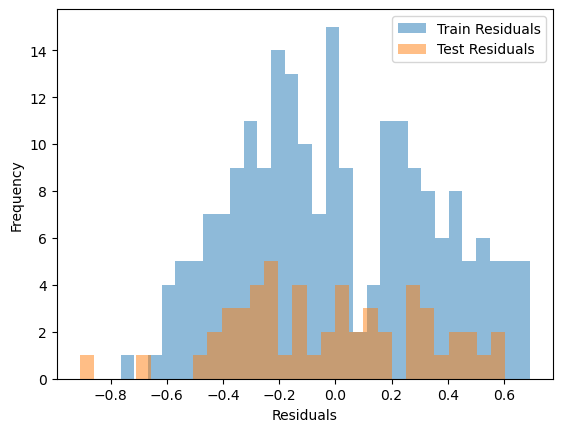

In [97]:
train_residuals = y_train - train_predictions.flatten()
test_residuals = y_test - test_predictions.flatten()

plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals')
plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [59]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm.keras import TqdmCallback
from keras import regularizers

# Перетворення даних до numpy масиву
X = np.array(data[['Home/Away', 'xG','ppda attack','scored']])
y = np.array(data['Wins'])

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова нейронної мережі
model = Sequential()
model.add(Dense(32, input_dim=5, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Перший шар з 32 нейронами, активацією ReLU та L2 регуляризацією
model.add(Dense(16, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Другий шар з 16 нейронами, активацією ReLU та L2 регуляризацією
model.add(Dense(1, activation='linear'))  # Вихідний шар з 1 нейроном і лінійною активацією

# Компіляція моделі
model.compile(loss='mean_squared_error', optimizer='Adam')

# Визначення зворотного виклику
callbacks = [TqdmCallback()]

# Навчання моделі
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, callbacks=callbacks, validation_data=(X_test_scaled, y_test))

# Оцінка точності моделі на тестових даних
r2 = model.evaluate(X_test_scaled, y_test)
print("R^2 Score:", r2)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
7/7 [==============================] - 2s 53ms/step - loss: 0.7946 - val_loss: 0.6523
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6697 - val_loss: 0.6104
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6072 - val_loss: 0.5811
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5683 - val_loss: 0.5463
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5374 - val_loss: 0.5174
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5154 - val_loss: 0.4969
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4976 - val_loss: 0.4772
Epoch 8/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4801 - val_loss: 0.4624
Epoch 9/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4654 - val_loss: 0.4482
Epoch 10/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4512 - val_loss: 0.4339
Epoch 11/50
7/7 [============

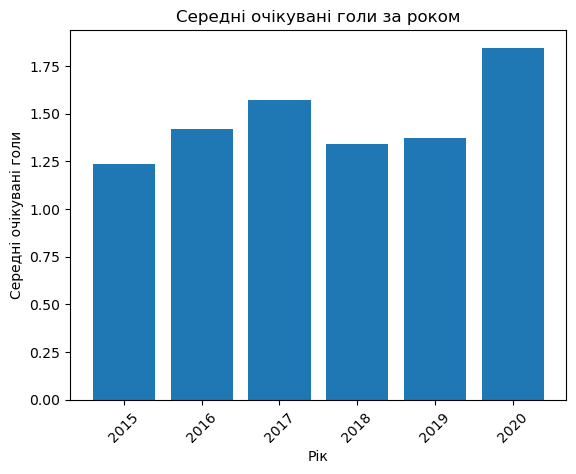

In [67]:
import matplotlib.pyplot as plt

# Групування даних за роком
data_by_year = data.groupby('Year')['xG'].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів
average_xG = data_by_year.values

# Візуалізація
plt.bar(years, average_xG)

plt.xlabel('Рік')
plt.ylabel('Середні очікувані голи')
plt.title('Середні очікувані голи за роком')
plt.xticks(rotation=45)  # Поворот підписів осі X для зручності
plt.show()

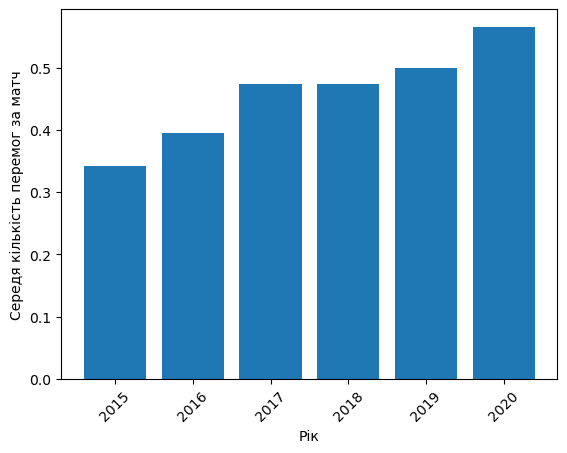

In [71]:
import matplotlib.pyplot as plt

# Групування даних за роком
data_by_year = data.groupby('Year')['Wins'].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів
average_xG = data_by_year.values

# Візуалізація
plt.bar(years, average_xG)

plt.xlabel('Рік')
plt.ylabel('Середя кількість перемог за матч')
plt.xticks(rotation=45)  # Поворот підписів осі X для зручності
plt.show()

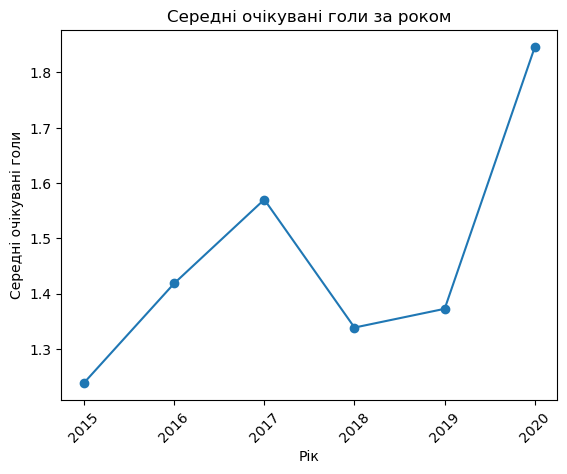

In [72]:
import matplotlib.pyplot as plt

# Групування даних за роком
data_by_year = data.groupby('Year')['xG'].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів
average_xG = data_by_year.values

# Візуалізація
plt.plot(years, average_xG, marker='o')

plt.xlabel('Рік')
plt.ylabel('Середні очікувані голи')
plt.title('Середні очікувані голи за роком')
plt.xticks(rotation=45)  # Поворот підписів осі X для зручності
plt.show()

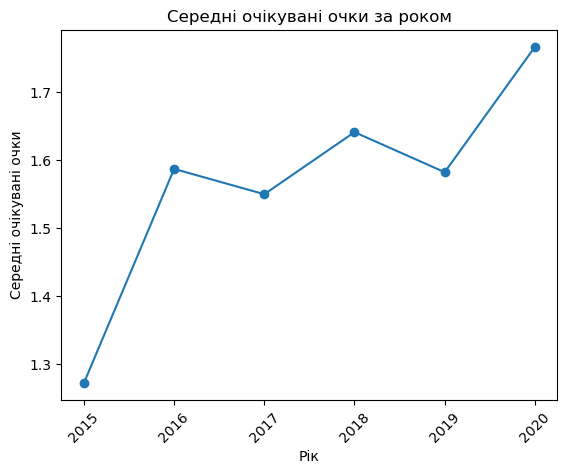

In [80]:
import matplotlib.pyplot as plt

# Групування даних за роком
data_by_year = data.groupby('Year')['Expected Points'].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів
average_xG = data_by_year.values

# Візуалізація
plt.plot(years, average_xG, marker='o')

plt.xlabel('Рік')
plt.ylabel('Середні очікувані очки')
plt.title('Середні очікувані очки за роком')
plt.xticks(rotation=45)  # Поворот підписів осі X для зручності
plt.show()

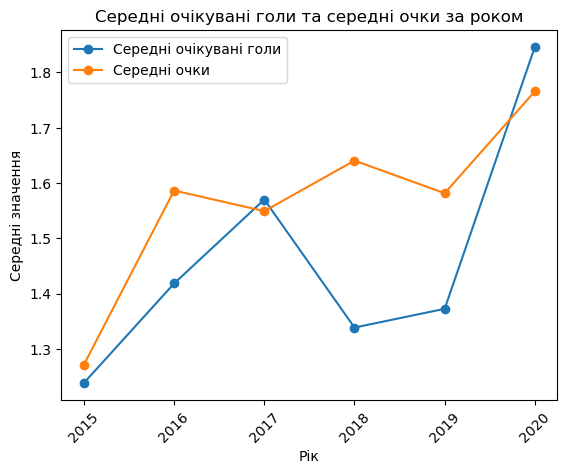

In [82]:
# Групування даних за роком
data_by_year = data.groupby('Year')[['xG', 'Expected Points']].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів і PPDA
average_xG = data_by_year['xG'].values
average_PPDA = data_by_year['Expected Points'].values

# Візуалізація
plt.plot(years, average_xG, marker='o', label='Середні очікувані голи')
plt.plot(years, average_PPDA, marker='o', label='Середні очки')

plt.xlabel('Рік')
plt.ylabel('Середні значення')
plt.title('Середні очікувані голи та середні очки за роком')
plt.xticks(rotation=45)
plt.legend()  # Додавання легенди з поясненнями ліній
plt.show()

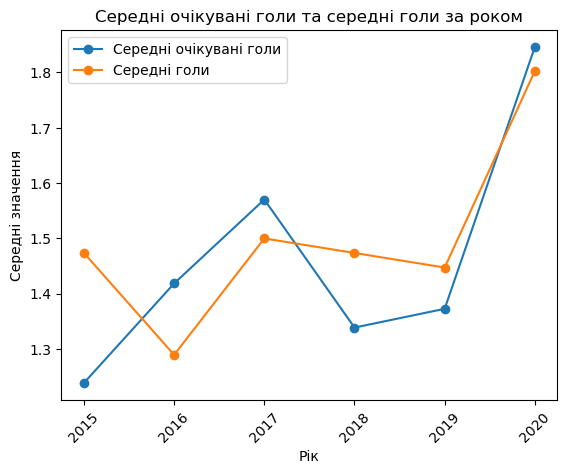

In [84]:
# Групування даних за роком
data_by_year = data.groupby('Year')[['xG', 'scored']].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів і PPDA
average_xG = data_by_year['xG'].values
average_PPDA = data_by_year['scored'].values

# Візуалізація
plt.plot(years, average_xG, marker='o', label='Середні очікувані голи')
plt.plot(years, average_PPDA, marker='o', label='Середні голи')

plt.xlabel('Рік')
plt.ylabel('Середні значення')
plt.title('Середні очікувані голи та середні голи за роком')
plt.xticks(rotation=45)
plt.legend()  # Додавання легенди з поясненнями ліній
plt.show()

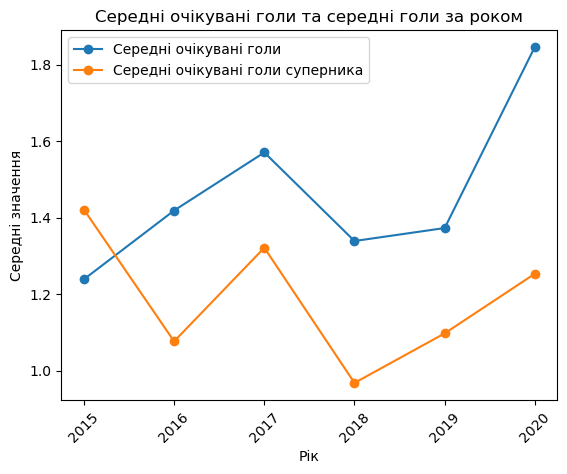

In [88]:
# Групування даних за роком
data_by_year = data.groupby('Year')[['xG', 'xGA']].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів і PPDA
average_xG = data_by_year['xG'].values
average_xGA = data_by_year['xGA'].values

# Візуалізація
plt.plot(years, average_xG, marker='o', label='Середні очікувані голи')
plt.plot(years, average_xGA, marker='o', label='Середні очікувані голи суперника')

plt.xlabel('Рік')
plt.ylabel('Середні значення')
plt.title('Середні очікувані голи та середні голи за роком')
plt.xticks(rotation=45)
plt.legend()  # Додавання легенди з поясненнями ліній
plt.show()

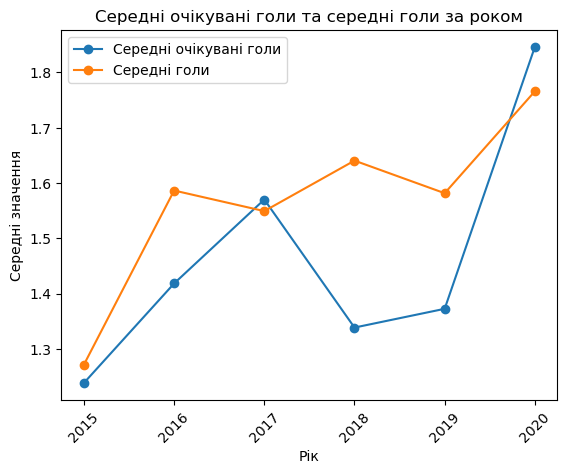

In [87]:
# Групування даних за роком
data_by_year = data.groupby('Year')[['xG', 'Expected Points']].mean()

# Роки
years = data_by_year.index

# Середні значення очікуваних голів і PPDA
average_xG = data_by_year['xG'].values
average_PPDA = data_by_year['Expected Points'].values

# Візуалізація
plt.plot(years, average_xG, marker='o', label='Середні очікувані голи')
plt.plot(years, average_PPDA, marker='o', label='Середні голи')

plt.xlabel('Рік')
plt.ylabel('Середні значення')
plt.title('Середні очікувані голи та середні голи за роком')
plt.xticks(rotation=45)
plt.legend()  # Додавання легенди з поясненнями ліній
plt.show()

In [106]:
X = np.array(data[['Home/Away', 'xG', 'ppda attack', 'scored','ppda allowed att','ppda allowed def']])
y = np.array(data['Wins'])
# Перетворення даних до DataFrame
data = pd.DataFrame({
    'Home/Away': X[:, 0],
    'xG': X[:, 1],
    'ppda attack': X[:, 2],
    'scored': X[:, 3],
    'ppda allowed att': X[:, 4],
    'ppda allowed def': X[:, 5],
    'Wins': y
})

# Обчислення матриці кореляції
correlation_matrix = data.corr()

# Виведення змінних з найвищою кореляцією з цільовою змінною
target_variable = 'Wins'
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)
top_correlated_variables = correlation_with_target.abs().nlargest(5)
print("Variables with highest correlation with 'Wins':")
print(top_correlated_variables)

Variables with highest correlation with 'Wins':
scored              0.662296
xG                  0.464148
Home/Away           0.090351
ppda allowed def    0.080004
ppda attack         0.048154
Name: Wins, dtype: float64
